<h1>Máquinas de vectores de soporte </h1>

Máquinas de Soporte Vectorial (SVM) (Support Vector Machines) para construir y entrenar un modelo utilizando registros de células humanas para luego clasificarlas en benignas o malignas.

SVM trabaja enlazando datos con un dimensión espacial de forma tal que los puntos de datos sean categorizados, inclusive cuando los datos no son linealmente separables. Un separador entre categorías primero se encuentra, luego los datos se transorman para que el separador pueda dibujarse como un hiperplano. Luego, rasgos de nuevos datos se pueden utilizar para predecir el grupo al cual un nuevo registro debería pertencer.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

El conjunto de datos consiste de varios registros de células humanas, cada una, conteniendo los valores de un conjunto de características de células. Los campos en cada registro son:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

In [2]:
# Importar datos
cell_df = pd.read_csv("../data/celulas.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


El archivo ID contiene los identificadores del paciente. Las características de las muestras de las células de cada paciente están contenidas en los campos 'Clump' a 'Mit'. Los valores van del 1 al 10, siendo 1 el más cerca a benigno.

El campo Class contiene el diagnóstico, como se confirmó por procedimientos médicos separados, si son las muestras benignas o no (valor = 2) o maligno (valor = 4).

Miremos a la distribución de las clases basadas en el grosor y uniformidad del tamaña de la célula:


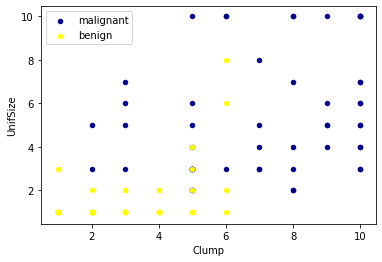

In [3]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

<h2>Preprocesamiento de Datos y selección</h2>


In [4]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Parece que la columna __BareNuc__ incluye algunos valores que no son numéricos. Podemos eliminar esas filas:

In [5]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [6]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

Queremos que el modelo prediga el valor de la columna Class (si es benigno (=2), si es maligno (=4)). Como este campo puede tener uno de dos valores posibles, necesitaremos cambiar su nivel de medición para reflejar eso.



In [7]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

<h2>Train/Test dataset </h2>

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


<h2> Modelado (SVM con aprendizaje Scikit)</h2>

El algoritmo SVM ofrece elegir funciones para realizar su procesamiento. Básicamente, mapear los datos en un espacio dimensional más alto se llama kernelling. La función matemática utilizada para la transformación se conoce como la función kernel, y puede ser de distintos tipos, a ser:

    1.Lineal
    2.Polimonial
    3.Función de base Radial (RBF)
    4.Sigmoide
Cada una de estas funciones tiene sus características, pros y contras y su ecuación, pero como no hay una forma sencilla de saber la función que mejor funcionaría, elegimos utilizar diferentes funciones y comparar los resultados. Utilicemos la función por omisión, RBF (Función Basada en Radio) para este lab.

In [9]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Luego que el modelo cuadró, se puede utilizar para predecir nuevos valores:

In [10]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

<h2>Evaluación</h2>

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

<h3> Matrix de confusión</h3>

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Matriz de confusión, sin normalización
[[85  5]
 [ 0 47]]


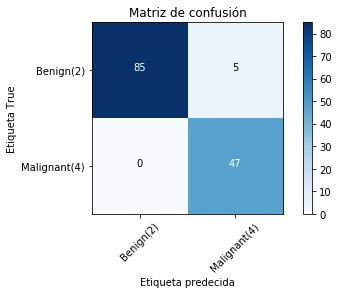

In [13]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Matriz de confusión')

<h3> F1 score</h3>

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

<h3> Jaccard </h3>

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

<h2>Practica</h2>

¿Se puede reconstruir el modelo, pero esta vez con un kernel __linear__? Podría utilizar la opción __ kernel='linear'__, cuando defina el SVM. ¿Cómo cambia la exactitud con la nueva función kernel?